#Importing Required Libraries

In [9]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

#Loading the Dataset

In [10]:
data = pd.read_csv("/content/drive/MyDrive/Simulator_PE/automobile_dataset.csv")

In [11]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,101,5800,23,29,16430


In [12]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

#Normalizing the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Scale the training set
X_scale = MinMaxScaler().fit(X)
X_trans = X_scale.transform(X) # fit and transform the data
X = pd.DataFrame(X_trans, columns = list(X.columns)) # convert matrix to data frame with columns

y_scale = MinMaxScaler().fit(np.array(y).reshape(-1, 1))
y = y_scale.transform(np.array(y).reshape(-1, 1))

#Linear Regression using Gradient Descent

In [14]:
X = np.column_stack(([1]*X.shape[0], X)) # add a column with ones for the bias value while converting it into a matrix
m,n = X.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X) # convert X into a numpy matrix
y = y.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations
cost = [] # list to store cost values
theta_new = [] # list to store updates coeffient values

In [15]:
# Linear Regression function

for i in range(0, iteration):
    pred = np.matmul(X,theta) # Calculate predicted value
    J = 1/2 * ((np.square(pred - y)).mean()) # Calculate cost function
   
    t_cols = 0 # iteration for theta values
    
    # Update the theta values for all the features with the gradient of the cost function
    for t_cols in range(0,n): 
        t = round(theta[t_cols] - alpha/m * sum((pred-y)*X[:,t_cols]),4) # calculate new theta value
        theta_new.append(t) # save new theta values in a temporary array
        
    # update theta array
    theta = [] # empty the theta array
    theta = theta_new # assign new values of theta to array
    theta_new = [] # empty temporary array
    cost.append(J) # append cost function to the cost array

#Visualization of Loss Function

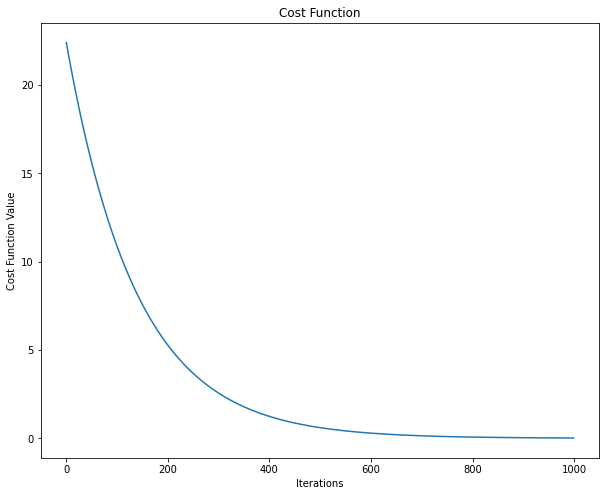

In [16]:
plt.figure(figsize=(10,8))
plt.plot(cost)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
None